/Users/zm4xw56/Library/Caches/pypoetry/virtualenvs/electricity-lstm-Hrr5BQwi-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zm4xw56/Library/Caches/pypoetry/virtualenvs/electricity-lstm-Hrr5BQwi-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zm4xw56/Library/Caches/pypoetry/virtualenvs/electricity-lstm-Hrr5BQwi-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na',

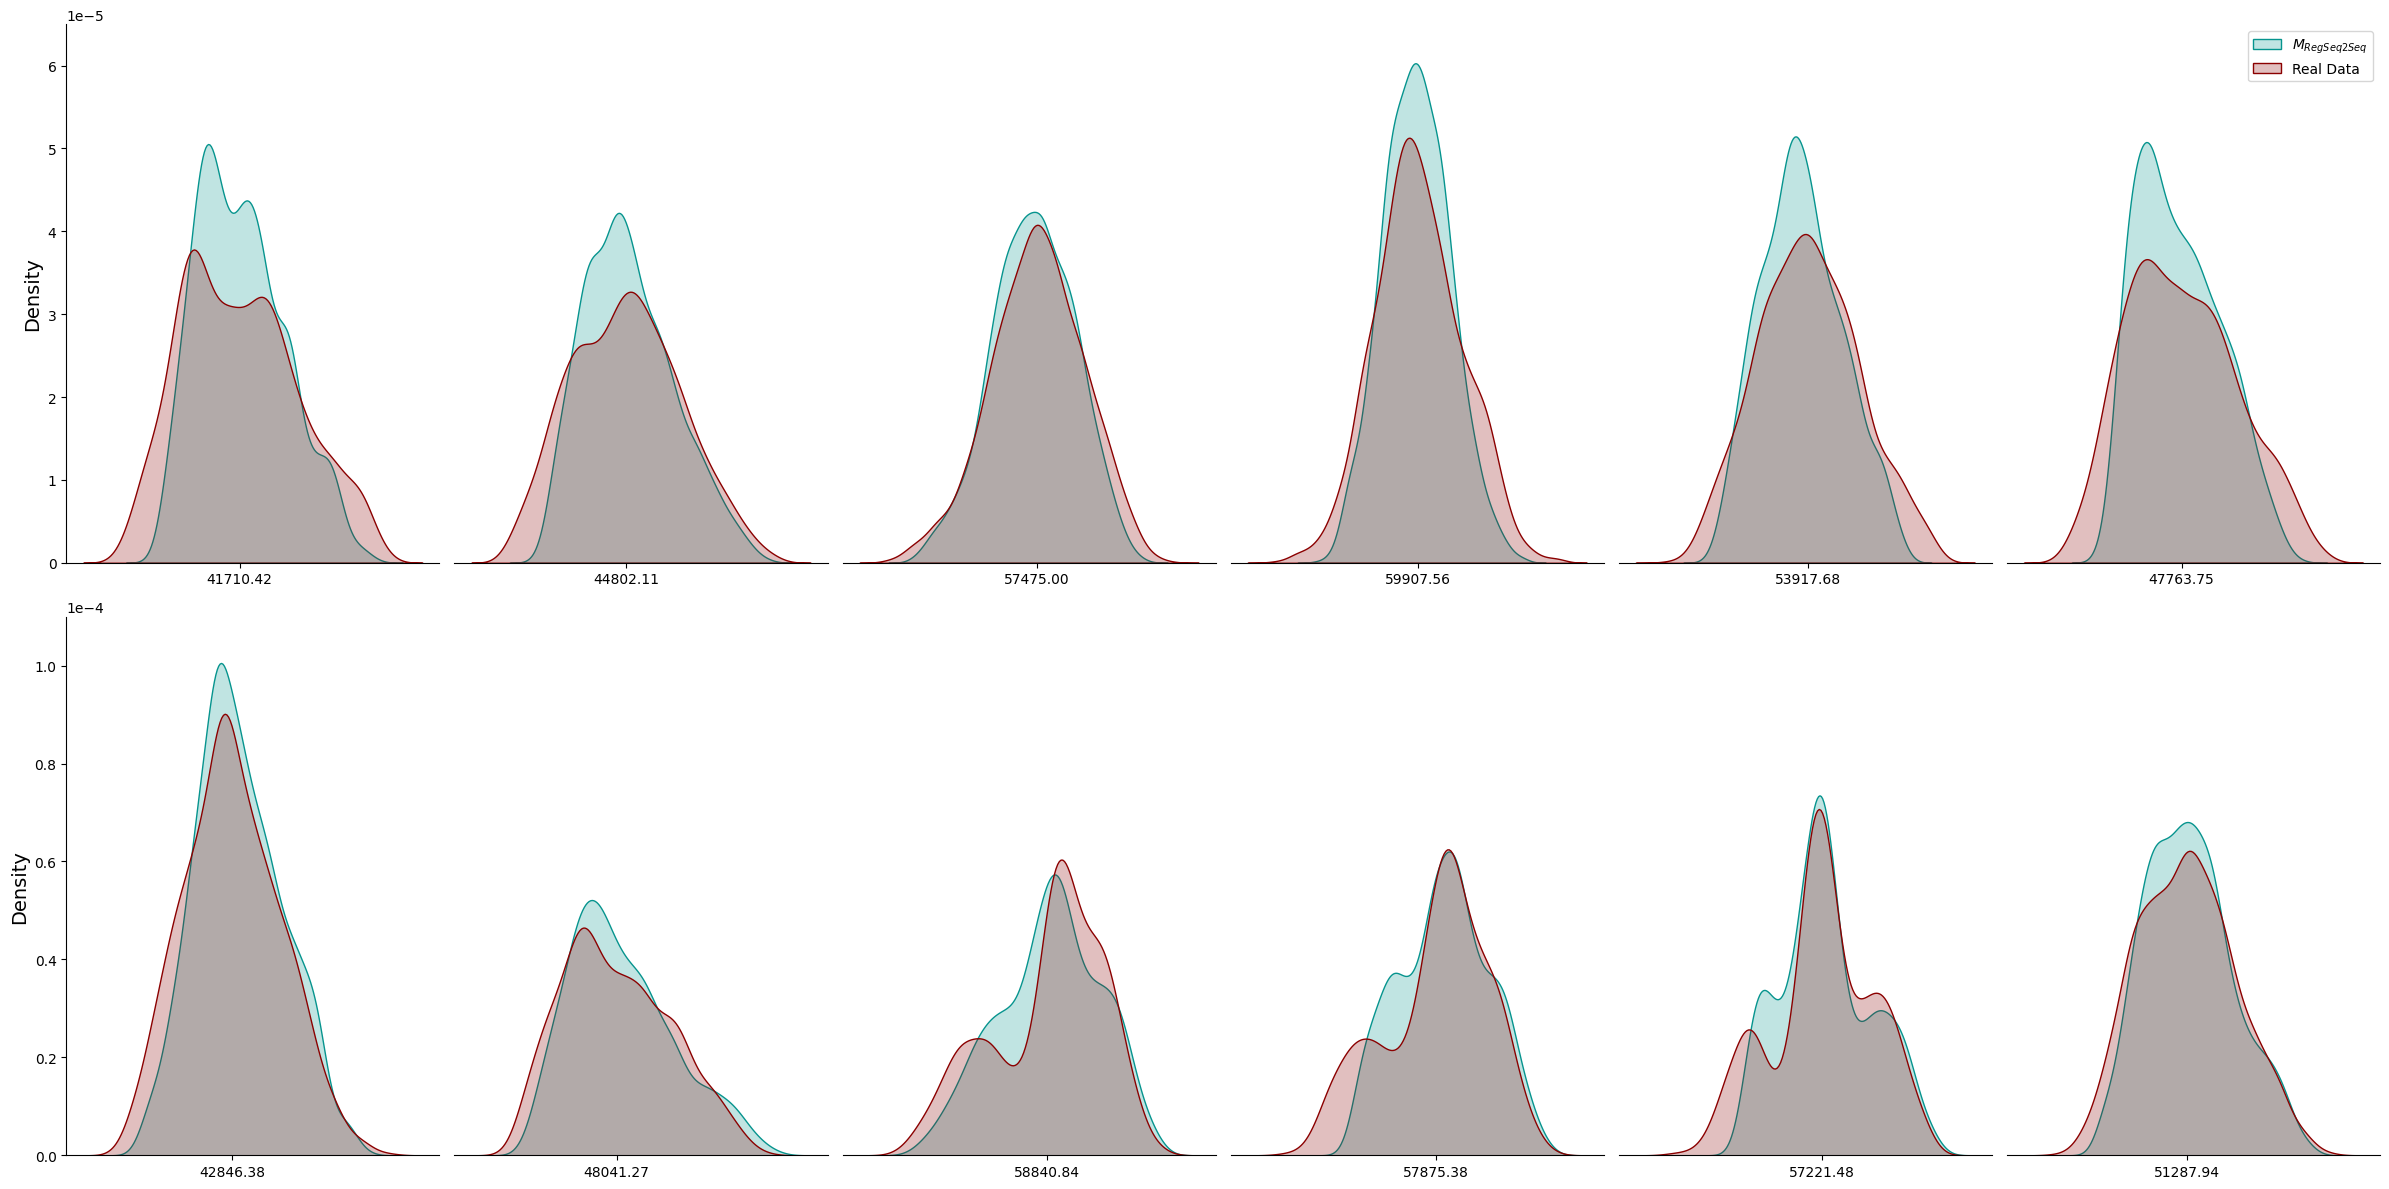

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Load your data
data = pd.read_csv('../results/imbalance_predictions_smard_real_mse_lstm_seq2seq_additive_regu_31_07_hour.csv')
data['start_time'] = pd.to_datetime(data['start_time'])
data['hour'] = data['start_time'].dt.hour

# Define time segments
time_segments = [(i, i+4) for i in np.arange(0, 24, 4)]

# Prepare the plot using histograms to show frequencies
fig, axs = plt.subplots(2, len(time_segments), figsize=(len(time_segments)*4, 12))

for i, (start, end) in enumerate(time_segments):
    segment_data = data[(data['hour'] >= start) & (data['hour'] < end)]
    
    # KDE for Production
    sns.kdeplot(segment_data['pred_total_production_mwh'], ax=axs[0, i], label=r"$M_{RegSeq2Seq}$", color='#06948E', fill=True)
    sns.kdeplot(segment_data['total_production_mwh'], ax=axs[0, i], label='Real Data', color='darkred', fill=True) 
    prod_mean = segment_data['total_production_mwh'].mean()
    axs[0, i].set_xticks([prod_mean])
    axs[0, i].set_xticklabels([f"{prod_mean:.2f}"])
    if i == len (time_segments) - 1:
        axs[0, i].legend()
    # set ylim to 180
    axs[0, i].set_ylim([0, 6.5e-5])
    # no xlabel
    axs[0, i].set_xlabel('')
    # fontsize of y label
    axs[0, i].yaxis.label.set_size(14)

    if i != 0:
        axs[0, i].set_yticks([])
        # remove y label
        axs[0, i].set_ylabel('')
        axs[0, i].spines['left'].set_visible(False)
    
    # Histogram for Consumption
    sns.kdeplot(segment_data['pred_total_load_mwh'], ax=axs[1, i], label=r"$M_{RegSeq2Seq}$", color='#06948E', fill=True)
    sns.kdeplot(segment_data['total_load_mwh'], ax=axs[1, i], label='Real Consumption', color='darkred', fill=True)
    cons_mean = segment_data['total_load_mwh'].mean()
    axs[1, i].set_xticks([cons_mean])
    axs[1, i].set_xticklabels([f'{cons_mean:.2f}'])
    axs[1, i].set_ylim([0, 1.1e-4])
    # no xlabel
    axs[1, i].set_xlabel('')
    #fontsize of x and y label
    axs[1, i].yaxis.label.set_size(14)
    axs[1, i].xaxis.label.set_size(14)
    if i != 0:
        axs[1, i].set_yticks([])
        # remove y label
        axs[1, i].set_ylabel('')
        axs[1, i].spines['left'].set_visible(False)
    # reduce horizontal space between subplots
    plt.subplots_adjust(wspace=0.01)
    # get rid of all right and top spines
    axs[0, i].spines['right'].set_visible(False)
    axs[0, i].spines['top'].set_visible(False)
    axs[1, i].spines['right'].set_visible(False)
    axs[1, i].spines['top'].set_visible(False)
    # y axsis scientific notation
    axs[0, i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))
    axs[1, i].ticklabel_format(axis='y', style='sci', scilimits=(0,0))

plt.tight_layout()
plt.show()

/Users/zm4xw56/Library/Caches/pypoetry/virtualenvs/electricity-lstm-Hrr5BQwi-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/zm4xw56/Library/Caches/pypoetry/virtualenvs/electricity-lstm-Hrr5BQwi-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='total_production_mwh', ylabel='Density'>

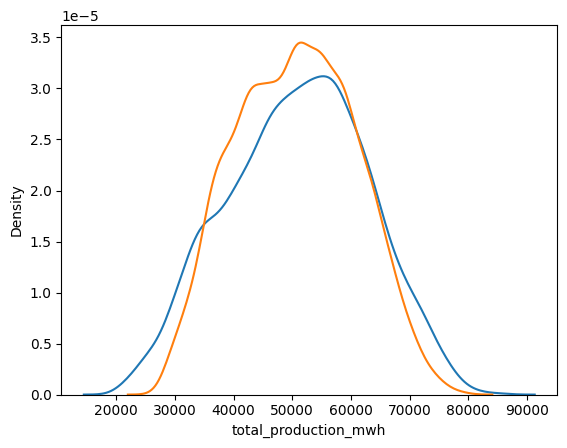

In [44]:
from seaborn import kdeplot
kdeplot(data['total_production_mwh'])
kdeplot(data['pred_total_production_mwh'])